# Research focus 

Suppose any continuous trends persist in the sale data, how does it change over time? If there are changes in the directions, we hope to identify it and visualize it.

To support our quest of understanding if there are any continuous trends in sale data. We worked out some analysis on our datasets. Due to a small mishap, our analysis were done on two different datasets. **Part 1** is performed on a dataset that collected data uptil 2016. In **part 2**, the analysis shifted to focus on the dataset with new game data up to 2019. 

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stsc

# Setting the styles of the graphs following
sns.set_style("dark")
sns.set_theme(font_scale = 1, color_codes = True)
plt.style.use(["tableau-colorblind10"])


# Part 1

--- 

## 1.1 Intro

The global sales account for all regional sales so I am omitting the sales by region for this exploration.
We are viewing this on a global scale[^Big] and focusing our report.

Brian Su

[^Big]: In the data processing, we noticed a lot of low sales titles that created horrible mean and median values. Those values were filtered out, more specification are in the found in `/../../analysis/Brian/Milestone 2 Analysis.ipynb` 

In [4]:
scripts = "analysis/scripts"
from scripts import load_and_process#from analysis.scripts import load_and_process
dfAll = load_and_process.load_and_process_all("../../data/raw/Video_game_sales_db.csv")
dfNin = load_and_process.load_and_process_nintendo("../../data/raw/Video_game_sales_db.csv")
dfAll

ImportError: cannot import name 'load_and_process' from 'scripts' (unknown location)

--- 

## 1.2 Global Sales Trend
We want to see the global sales of games by the year. To hopefully establish a trend or discover some more useful data in the process. For this process, we chose to employ the `groupby` process to group up by year, genre, publisher and platform of the different published games. Once the grouping is done, we take the sum of global sales to plot the graph of sales of games over the years.



The grouping results are sampled below:

In [18]:
df2019G = dfAll.groupby(["Year","Genre", "Publisher", "Platform"]).sum()["Global_Sales"]
#df2019G
dfG = pd.DataFrame(df2019G)
dfG

Global_Sales
Year   Genre        Publisher            Platform              
1984.0 Shooter      Nintendo             NES              28.31
1985.0 Platform     Nintendo             NES              40.24
1988.0 Platform     Nintendo             NES              17.28
1989.0 Platform     Nintendo             GB               18.14
       Puzzle       Nintendo             GB               30.26
...                                                         ...
2013.0 Shooter      Activision           PS3               9.59
                                         X360             10.21
2014.0 Action       Take-Two Interactive PS4              11.98
       Role-Playing Nintendo             3DS              11.33
2015.0 Shooter      Activision           PS4              14.24

[73 rows x 1 columns]

--- 
Graph of the results from `groupby` function. 
Most of the axis labelled stand only to illustrate a Nintendo dominated sales trend in the years 2000 and onwards. 

--- 

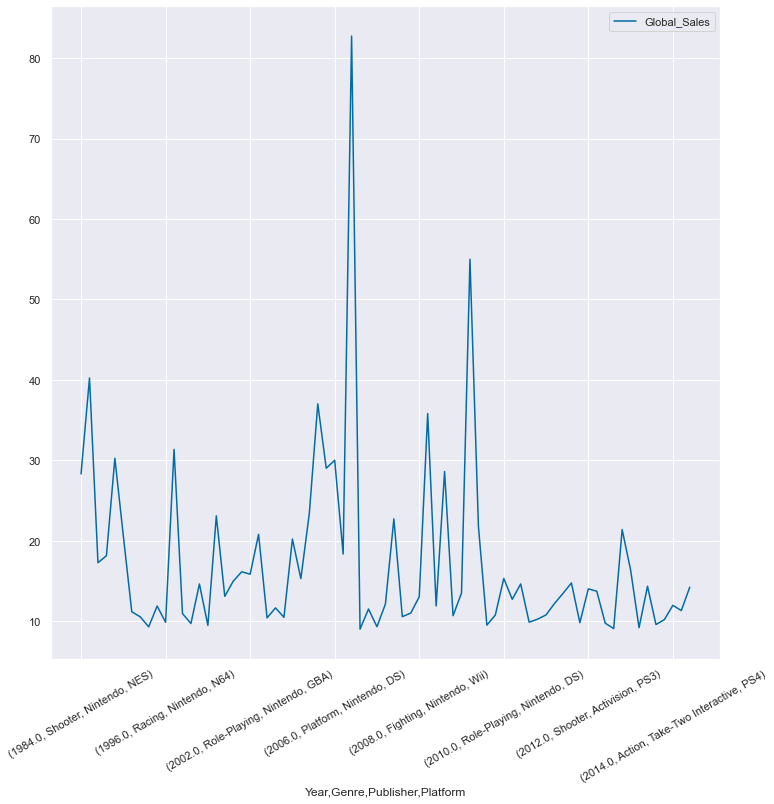

In [31]:
dfG.plot(figsize=(12,12))
plt.xticks(rotation=30) 
plt.show()

---

The line plot shown demonstrates that most peaks in gaming sales from 1984 to 2016 is mostly caused by new Nintendo game sales. The graph does not show us a particular sales trend that persists through the years. As the peaks labeled are of different genres for most peaks. Although, at the current stage of our exploration, we can only suspect that Nintedo seems to be doing pretty well. 

--- 
## 1.3 The Nintendo Magic

Further our analysis on this interesting area. We aimed to explore more of Nintendo's sales trends more indepthly. For that we call the dataframe `dfNin` which focuses the datas on only Nintendo titles. 

In [25]:
dfNin.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,Global_Sales,Averaged_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,82.74,11.443983
1,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,35.82,4.954357
2,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,33.00,4.564315
3,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,30.01,4.150761
4,8,Wii Play,Wii,2006.0,Misc,Nintendo,29.02,4.013831


<AxesSubplot:xlabel='Year', ylabel='Averaged_Sales'>

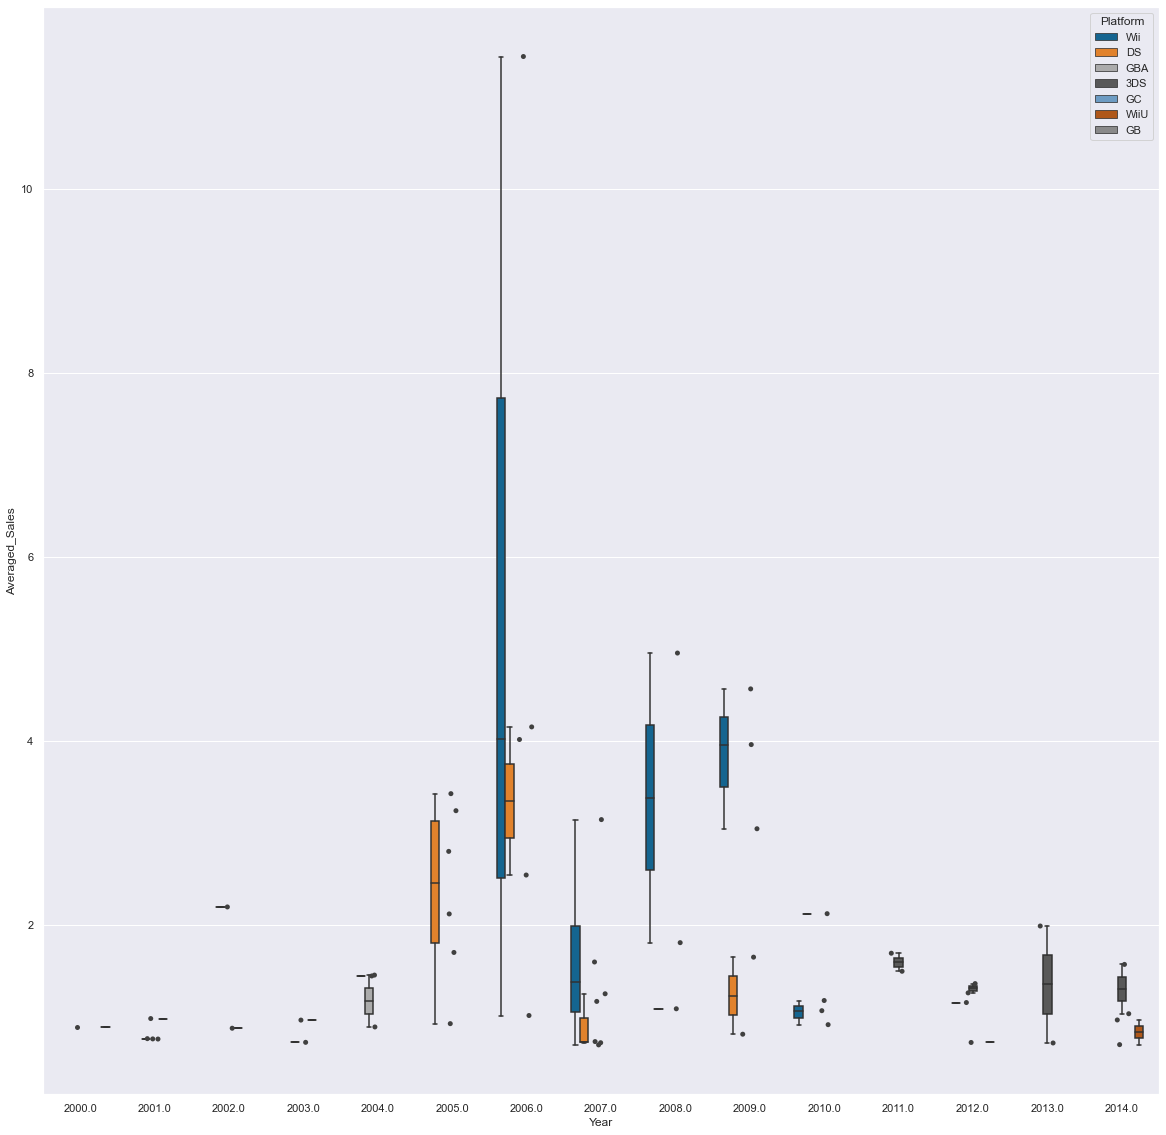

In [32]:
plt.figure(figsize=(20, 20))
sns.boxplot(data = dfNin, x = "Year", y = "Averaged_Sales", whis = 1.5, hue ="Platform")
# swarm plot to display the datapoints over the box plot
sns.stripplot(data = dfNin, x = "Year", y = "Averaged_Sales", color = "0.25")

From the graph, we see a more in-depth break down of Nintendo sales per title and by the platform. For a while, the Wii titles were going strong from the time when it launched. Which the peak of Wii sport sales is apparent in the 2016 stripplot. Topping the averaged sales of 10[^1], averaged sales is obtained by `global_sales/median(global_sales)` Refer to top for more information on the process.  

This gives us an idea of Nintendo's focus on the Wii and it's huge success in the few years of its launch. This made us curious about what types of games is selling so well? We find out by the following plots. 

[^1]: Assuming units are in million units. 

---

## 1.3.1 Which genres are HOT

Investigating Wii average sales per genre after year 2000, only considering games ranked higher than 2500.



<AxesSubplot:xlabel='Averaged_Sales', ylabel='Genre'>

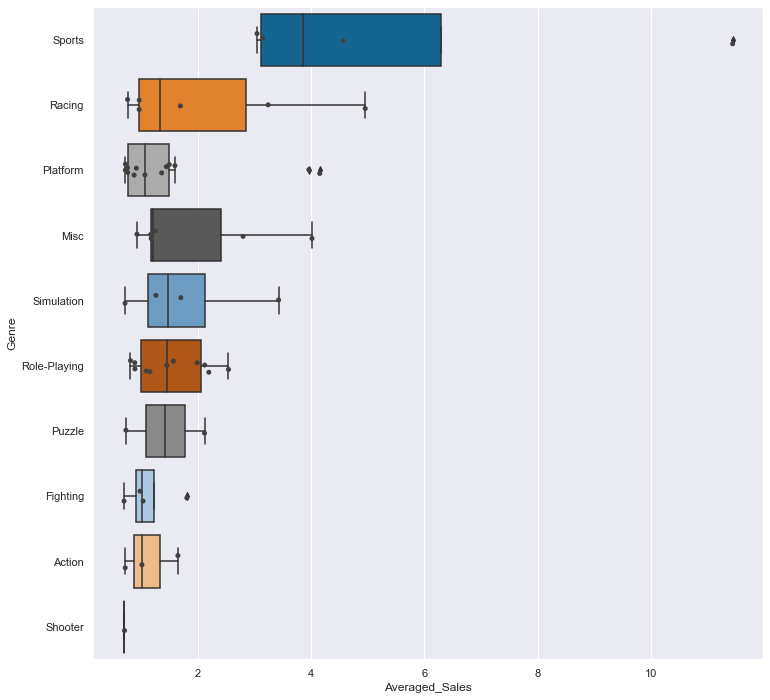

In [34]:
plt.figure(figsize=(12, 12))
sns.boxplot(data = dfNin, x = "Averaged_Sales", y = "Genre", whis = 1.5)
# swarm plot to display the datapoints over the box plot
sns.stripplot(data = dfNin, x = "Averaged_Sales", y = "Genre", color = "0.25")

**Surprise, suprise** the top genre of games that sold were the sports titles—considering our previous understanding that the Wii platform drove a lot of Nintendo sales. The Nintendo Wii was a platform that focused on movement. It had not one but two controllers to be held in each hand of the user. The game console had a sensor that tracked the activities of the controllers. With which the users could play sports or interact with the game that way. It was creating a lot of moments as compared to other consoles using a simple traditional controller. Thus, in the period from 2006 to 2009 we see higher sales of sport titles.

Further analysis on the trends are in part 2. Done with dataset including title sales up to the year of 2019. To broaden our range of analysis with more recent titles and more data made available for discovery. 

--- 

# Part 2

In [2]:
from scripts import spandan_load_and_process 
region_genre_popularity = slp.sales_by_region("../../data/raw/Video_game_sales_db.csv")
old_genres= spandan_load_and_process.genre_populartity_old("../../data/raw/Video_game_sales_db.csv")
new_genres= spandan_load_and_process.genre_popularity_new("../../data/raw/Video_game_sales_db.csv")
best_genres = spandan_load_and_process.top_genre_best("../../data/raw/Video_game_sales_db.csv")
old_genres

ImportError: cannot import name 'spandan_load_and_process' from 'scripts' (unknown location)